In [419]:
#!pip install -q seabo n

In [420]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import math
import csv
import collections
from collections import defaultdict
import pandas as pd
import scipy as scipy
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

#print(tf.__version__)

In [421]:
pollutantForExperiment = 'BlkCarbon'
trainingDataFile = pollutantForExperiment + '-Train.csv'
testingDataFile = pollutantForExperiment + '-Test.csv'

In [422]:
trainDf = pd.read_csv(trainingDataFile)
testDf = pd.read_csv(testingDataFile)

featureList = ['ExpRL.100','BldVolD.50','Lat','BldArD.50','MainAADT.50','ExpRL.5000','IndT.1500','InterD.100',
               'IndT.2000','OpArT.5000','LnDist_ShenzhenP','OpArT.4000','Dist_ShenzhenP','SecRL.300','Elevation',
               'ExpRL.3000','ExpRL.200','BldArD.200','IndT.5000','OpArT.1000','IndT.3000','OpArT.500',
               'Predictions-Lenwo','SecRL.25',pollutantForExperiment]
'''

featureList = ['ExpRL.100','BldVolD.50','Lat','BldArD.50','MainAADT.50','ExpRL.5000','IndT.1500','InterD.100',
               'IndT.2000','OpArT.5000','LnDist_ShenzhenP','OpArT.4000','Dist_ShenzhenP','SecRL.300','Elevation',
               'ExpRL.3000',pollutantForExperiment]
'''

train_dataset = trainDf[featureList]
test_dataset = testDf[featureList]

In [423]:
#df = df[np.isfinite(df['BlkCarbon'])]
#df = pd.read_csv('data.csv')

# Remove redundant features
#raw_dataset = df[['BldVolD.50', 'Dist_ShenzhenP', 'Lat', 'BldArD.50', 'ExpRL.3000', 'LnDist_TollGate', 'LnDist_ShenzhenP', 
#                  'Dist_TollGate','LnDist_Lamma','BlkCarbon','SiteID']]
#raw_dataset = df

# Note that 'Lands.500' is not in dataset

In [424]:
#column_names = ['ExpRL.3000', 'ExpRL.50', 'Long', 'CarPD.50', 'ComT.500', 'ResT.50', 'MixT.500', 'Eat.500', 'BlkCarbon']
#raw_dataset = pd.read_csv('data.csv', names=column_names)

In [425]:
#dataset = raw_dataset.copy()
#dataset.tail()

## Dataset Generation for Experimens

In [426]:
'''
df = df[np.isfinite(dataset[pollutantForExperiment])]
X = df
y = df[pollutantForExperiment]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#print(len(X_train))
X_train.to_csv(pollutantForExperiment + "-Train.csv", sep=',')
X_test.to_csv(pollutantForExperiment + "-Test.csv", sep=',')
'''

'\ndf = df[np.isfinite(dataset[pollutantForExperiment])]\nX = df\ny = df[pollutantForExperiment]\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)\n#print(len(X_train))\nX_train.to_csv(pollutantForExperiment + "-Train.csv", sep=\',\')\nX_test.to_csv(pollutantForExperiment + "-Test.csv", sep=\',\')\n'

## Clean the data

The dataset contains a few unknown values.

In [427]:
# Print the values which are unknown in dataset
#dataset.isna().sum()

In [428]:
#dataset = dataset.dropna()
#df1 = df1[np.isfinite(df1['PM2.5'])]
# Print the values which are unknown after removing unknowns
#dataset.isna().sum()

In [429]:
#train_dataset = dataset.sample(frac=0.8 , random_state=1)
#print(len(train_dataset.index))
#test_dataset = dataset.drop(train_dataset.index)

In [430]:
#train_dataset['SiteID']

### Inspect Data

In [431]:
#sns.pairplot(train_dataset[["BlkCarbon", "ExpRL.3000", "CarPD.50", "Eat.500"]], diag_kind="kde")
#sns.pairplot(train_dataset[["BlkCarbon", "ExpRL.100", "BldArD.50", "IndT.2000"]], diag_kind="kde")

In [432]:
train_stats = train_dataset.describe()
train_stats.pop("BlkCarbon")
train_stats = train_stats.transpose()
#train_stats

In [433]:
#train_dataset['SiteID'].to_csv("BlkCarbon-1-Train", sep=',')

In [434]:
#test_dataset['SiteID'].to_csv("BlkCarbon-1-Test",sep=',')

In [435]:
#train_dataset.pop("SiteID")
#test_dataset.pop("SiteID")

Reference for k fold CV dataset generation: https://stackoverflow.com/questions/39748660/how-to-perform-k-fold-cross-validation-with-tensorflow

In [436]:
k_fold = KFold(n_splits = 3)
for train_indices, test_indices in k_fold.split(train_dataset):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] | test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] | test: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] | test: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


In [437]:
#train_dataset

### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [438]:
train_labels = train_dataset.pop('BlkCarbon')
test_labels = test_dataset.pop('BlkCarbon')

### Normalize the data

Since feature ranges are different, we need to normalize the data.
When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.

In [439]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Modelling


### Build the model

Let's build our model. Here, we'll use a Sequential model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, build_model, since we'll create a second model, later on.

If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
Early stopping is a useful technique to prevent overfitting.

Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems)

In [440]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(0.001) #optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [441]:
model = build_model()
#print(len(train_dataset.keys()))

### Inspect the model

In [442]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 64)                1600      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________


Now try out the model. Take a batch of 10 examples from the training data and call model.predict on it.

In [443]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
#example_result

# Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the history object.

In [444]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 600

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

Visualize the model's training progress using the stats stored in the history object.

In [445]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#hist.tail()

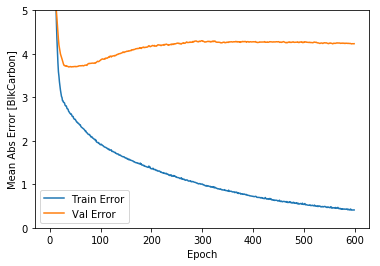

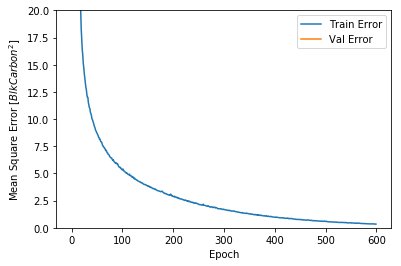

In [446]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [BlkCarbon]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$BlkCarbon^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
Early stopping is a useful technique to prevent overfitting.


.............................................

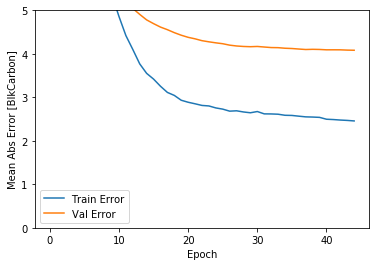

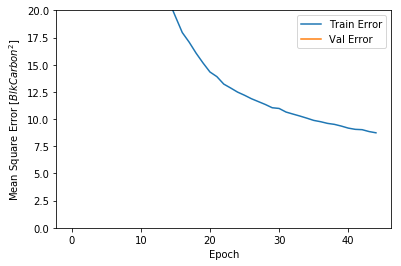

In [447]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

Let's see how well the model generalizes by using the test set, which we did not use when training the model. This tells us how well we can expect the model to predict when we use it in the real world.
Evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE)

In [448]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Absolute Error     (MAE) : {:5.2f} BlkCarbon".format(mae))
print("Testing set Mean Squared Error      (MSE) : {:5.2f} BlkCarbon".format(mse))
print("Testing set Root Mean Squared Error (RMSE): {:5.2f} BlkCarbon".format(math.sqrt(mse)))

Testing set Mean Absolute Error     (MAE) :  4.48 BlkCarbon
Testing set Mean Squared Error      (MSE) : 35.22 BlkCarbon
Testing set Root Mean Squared Error (RMSE):  5.93 BlkCarbon


## Make Predictions

Finally, predict BlkCarbon values using data in the testing set:

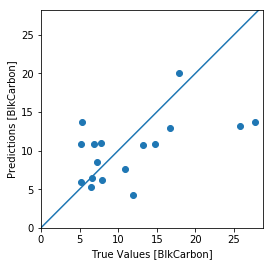

In [449]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [BlkCarbon]')
plt.ylabel('Predictions [BlkCarbon]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Let's take a look at the error distribution.

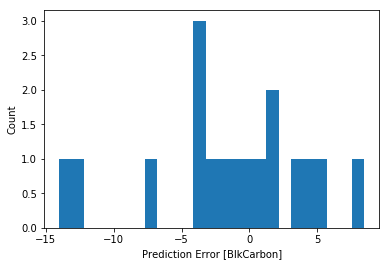

In [450]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [BlkCarbon]")
_ = plt.ylabel("Count")

In [453]:
print(test_predictions, test_labels)

[ 4.215235  10.795405  10.859553  13.232196   5.3294406  8.519065
 13.685134  10.718909  20.044565  13.752586   7.5671287  5.938997
  6.4054356  6.187186  12.971801  10.834007  10.961824 ] 0     11.910603
1      6.857398
2     14.805056
3     25.762478
4      6.533451
5      7.264362
6     27.685461
7     13.258188
8     17.913024
9      5.330765
10    10.918706
11     5.223136
12     6.674194
13     7.896829
14    16.750286
15     5.199572
16     7.840254
Name: BlkCarbon, dtype: float64
